# Cleaning Up The Data

In this notebook, I control for missing data and errors due to data input inconsistencies, narrow down extraneous columns, and classify products into a common diet type.

The cleaned dataset contained 352433 and 33 columns. Out of these columns, there are several key variables of interest.

The country column will tell us the country in which this product was uploaded to the food products database. We will rely on it as an indicator of the country the food product is associated with. Product_name serves as an identifier for each product.

I will rely on the following columns to analyze the general nutrition characteristics of the food products:

Saturated-Fat
Trans-Fat
Fiber
Sugars
Proteins
Sodium

The Categories and Labels columns will help us identify which type of diet the food product falls into. Though the carbon footprint column has many missing values, we will still use it to learn what we can about the environmental impact of products. We also have a column 'Special Diet' that indicates whether the food product can be classified into a common diet type.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure 
%pylab inline

from bokeh.io import output_notebook
from bokeh.plotting import figure, show

plot = figure(plot_width=600, plot_height=400, tools='pan,box_zoom')
output_notebook()

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

### Importing And Reading In The Data File

The data file is saved as a tsv (tab seperated file). You must set sep='\t' to specify that the data is seperated by tabs. Pandas attempts to guess the datatypes of each column. However, the data file is  large and guessing the datatype is memory demanding. Setting low_memory to false will tell pandas to avoid guessing the datatype so save memory and processing time

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv',sep='\t')
print("This data set contains",len(df),"rows and ",len(df.columns),"columns")

This data set contains 356027 rows and  163 columns


This data set contains 356,027 food products from around the world and 163 characteristics for each product. The data was obtained from Open Food Facts (https://world.openfoodfacts.org/) - a free collaborative database of food products with each product uploaded by users who scan the food products and upload pictures of their nutrition labels. The data set contains a wide variety of information on each product ranging from the ingredients to allergens to nutrition facts, all gathered from the packaging labels. You can view the first 5 rows of the dataset below:

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selecting Columns of Interest

This dataset contains a wide variety of characteristics on the products. Below you can observe a snapshot of the columns this data set contains. 

In [4]:
df.columns.values[50:90]

array(['ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states',
       'states_tags', 'states_en', 'main_category', 'main_category_en',
       'image_url', 'image_small_url', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g',
       '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g',
       '-montanic-acid_100g', '-melissic-acid_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g',
       '-arachido

As you can observe, this dataset contains some very indepth nutritional characteristics of food products, ranging from the amount of caproic acid per 100g to the ratio between collagen, meat, and protein per 100g. These features are interesting and useful for a thorough and comprehensive nutritional evaluation.

The aim of this analysis is to gain a macro understanding of how different countries eat. Let's clean up the dataset to focus on the more generic food product characteristics.

The below code drops features from the dataset that are too specific for this analysis.

Additionally, any column that ends in '\_en' contains that column's characteristics in English. We will drop any columns that contain similar information in another form. For example, the column 'countries_en' contains the name of the country (in English) where each product was scanned and uploaded. The columns 'countries' and 'countries_tags' contain similar information but in a messier format. We will stick with 'countries_en' for ease of analysis. 

In [5]:
columns_to_drop = ['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime','no_nutriments', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags','pnns_groups_1', 'pnns_groups_2',  '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g',
       '-palmitic-acid_100g', '-stearic-acid_100g',
       '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g',
       '-montanic-acid_100g', '-melissic-acid_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g',
       '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g',
       '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g',
       '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g','-maltose_100g', '-maltodextrins_100g',
       'starch_100g', 'polyols_100g',  'casein_100g', 'serum-proteins_100g', 'nucleotides_100g',  'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'pantothenic-acid_100g', 'silica_100g',
       'bicarbonate_100g','chloride_100g', 'phosphorus_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g',
       'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g',
       'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g',
       'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g',
       'chlorophyl_100g','water-hardness_100g', 'categories',
       'categories_tags', 'labels',
       'labels_tags','emb_codes', 'emb_codes_tags','allergens','countries','countries_tags',
        'additives_n', 'additives', 'additives_tags','traces', 'traces_tags', 'states',
       'states_tags', 'main_category']
clean_df = df.drop(columns_to_drop,axis=1)

Our dataset now has the following columns:

In [6]:
clean_df.columns.values

array(['product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'brands_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels_en',
       'first_packaging_code_geo', 'cities', 'cities_tags',
       'purchase_places', 'stores', 'countries_en', 'ingredients_text',
       'allergens_en', 'traces_en', 'serving_size', 'additives_en',
       'nutrition_grade_uk', 'nutrition_grade_fr', 'states_en',
       'main_category_en', 'image_url', 'image_small_url', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g',
       '-lactose_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'alcohol_100g', 'vitamin-a_100g',
       'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g',
       'vitamin-k_100g', 'vit

As we are interested in understanding how different countries eat, it is essential to know the name of the country in which the product was scanned and uploaded. 

In [7]:
clean_df2 = clean_df.dropna(subset=['countries_en'], how='any')
print("We dropped",len(clean_df)-len(clean_df2),"rows with missing country names")
print("Our new data set has",len(clean_df2),'rows')

We dropped 275 rows with missing country names
Our new data set has 355752 rows


### Where Do Our Food Products Come From?

The column 'countries_en' contains the name of the country (in English) where each product was scanned and uploaded. We will assume that's where the product was purchased. 

In [8]:
clean_df2['countries_en'].value_counts().sort_values(ascending=False)

United States                               173159
France                                      123961
Switzerland                                  14932
Germany                                       8470
Spain                                         5529
                                             ...  
Denmark,France,United States                     1
Belgium,France,Luxembourg,Netherlands            1
Belgium,France,French Guiana                     1
Burkina Faso,Côte d'Ivoire                       1
Belgium,Brazil,Canada,France,Switzerland         1
Name: countries_en, Length: 779, dtype: int64

Looks like some products contain multiple country names. Entries contain multiple countries if they contain a comma in the country name. Let's see how many:

In [9]:
import re
def multiple_country(s):
    return (len(re.findall(',', s))>0)
    #returns true if entry in 'countries_en' contains multiple country names

counts = clean_df2['countries_en'].map(multiple_country) 
len(counts[counts==True]) #number of entries that contain multiple names 

6412

That's quite a few products that have multiple country names listed. As the entry in 'countries_en' contains the country the product was scanned and uploaded to the database in, it means that product is found within that country. Let's duplicate those products so that each product is associated with a single country name.

For example, if a product was found in the Czech Republic, Hungary, and Slovakia, we want to have this product appear 3 times in our data set with a single country name listed in our 'countries_en' column. 

Even though this will result in duplicated products, we are interested in analyzing foods found in each country, not the individual products. It will aid us in comparing how countries eat. 

In [10]:
clean_df2 = clean_df2.assign(country=clean_df2['countries_en'].str.split(',')).explode('country')
#takes the string of countries in 'countries_en'
#splits them on the comma 
#creates a list of countries per product

#the method explode "explodes" the list into separate rows on the country name
#and retains all other information for each row 

In [11]:
countries = clean_df2['country'].value_counts().sort_values(ascending=False)
countries

United States               173708
France                      129320
Switzerland                  17204
Germany                       9403
Spain                         6061
                             ...  
Somalia                          1
United-states-of-america         1
Other-العراق                     1
fr:Alemania                      1
nl:Deutschland                   1
Name: country, Length: 224, dtype: int64

Our dataset now contains products from 174 different countries. There are still some odd formats of country names in this dataset. As we're interested in comparing how countries eat, we need to look at countries that have a significant number of products. While we may not be sure how many products will lead to reliable insights into a country's eating habits, for now, let's look at countries that have more than 1000 products. 


In [12]:
clean_df2.to_csv('All_Countries.csv') 

In [13]:
top_countries = countries[countries>1000]
top_countries

United States     173708
France            129320
Switzerland        17204
Germany             9403
Spain               6061
United Kingdom      5987
Belgium             4088
Australia           2319
Russia              1641
Italy               1632
Canada              1070
Name: country, dtype: int64

In [14]:
df = clean_df2[clean_df2['country'].isin(top_countries.index)] 
#grabbing products from countries who have at least 100 products

In [15]:
print("We have information on",len(df),"products from 11 countries.")

We have information on 352433 products from 11 countries.


Let's save both of the cleaned datasets (one with products from 11 countries and one with products from all countries) for future use. 

In [16]:
df.to_csv('Food_Products.csv') 
clean_df2.to_csv('All_Countries.csv') 

# Inspecting Data Quality

It's obvious that our dataset has a lot of missing data. Let's look into this further.

In [17]:
df.head()

,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories_en,origins,origins_tags,...,potassium_100g,calcium_100g,iron_100g,magnesium_100g,zinc_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,country
0,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,0.00129,NaN,NaN,NaN,14.0,14.0,NaN,United States
2,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,...,NaN,0.071,0.00129,NaN,NaN,NaN,0.0,0.0,NaN,United States
3,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,...,NaN,0.143,0.00514,NaN,NaN,NaN,12.0,12.0,NaN,United States
4,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States


Our dataset contains 352433 products. Let's look into the columns that are missing data for more than 250,000 observations.

In [18]:
missing_values = df.isnull().sum()
many_missing = missing_values[missing_values > 250000]
many_missing

generic_name                 294144
packaging                    261181
packaging_tags               261182
origins                      327502
origins_tags                 327543
manufacturing_places         309543
manufacturing_places_tags    309551
labels_en                    291520
first_packaging_code_geo     331158
cities                       352433
cities_tags                  329514
purchase_places              284887
stores                       293376
allergens_en                 352433
traces_en                    323322
nutrition_grade_uk           352433
image_url                    275961
image_small_url              275961
energy-from-fat_100g         351538
-sucrose_100g                352345
-glucose_100g                352397
-fructose_100g               352382
-lactose_100g                352132
alcohol_100g                 347763
beta-carotene_100g           352396
vitamin-d_100g               345220
vitamin-e_100g               350974
vitamin-k_100g              

Even though they are missing significant amounts of data, the columns that contain a food product's generic name, origin,  labels, place of purchase, store, energy from fat, and carbon footprint may still offer useful insights. Let's keep these and drop the other columns listed. 

In [19]:
columns_keep = ['generic_name','origins', 'packaging', 'labels_en', 'purchase_places','stores', 'carbon-footprint_100g']
columns_drop = []
for col in many_missing.index.tolist():
    if col not in columns_keep:
        columns_drop.append(col)

In [20]:
df = df.drop(columns_drop,axis=1)

Let's look into the values for the columns with many missing values that we decided to keep:

In [21]:
origins = df['origins'].value_counts()
purchase_p = df['purchase_places'].value_counts()
stores = df['stores'].value_counts()
generic = df['generic_name'].value_counts()
labels = df['labels_en'].value_counts()
packaging = df['packaging'].value_counts()


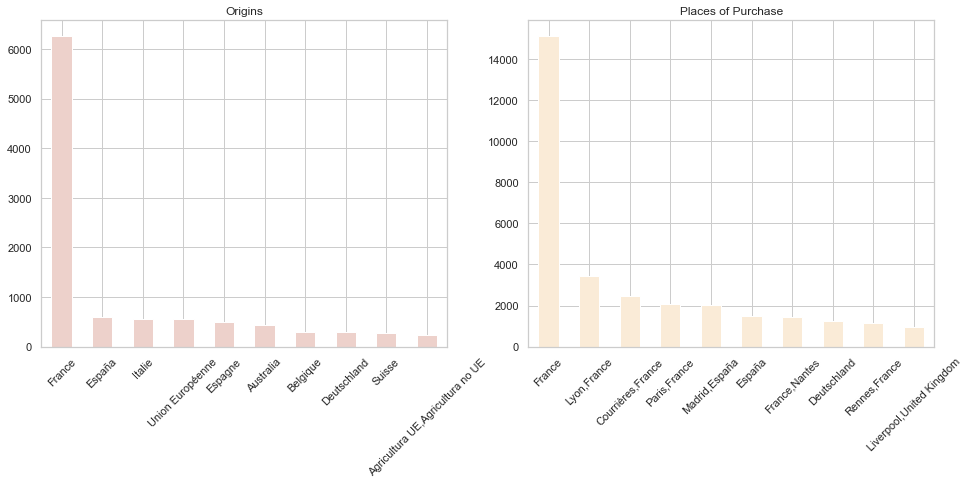

In [24]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(16,6))

origins[0:10].plot.bar(color=(sns.cubehelix_palette(1)),ax=axs[0])
axs[0].set_title("Origins")

purchase_p[0:10].plot.bar(color=('antiquewhite'),ax=axs[1])
axs[1].set_title("Places of Purchase")


for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)
    



It appears that both origins and places of purchase are related to only French products. As we're interested in generally comparing the products within different countries, let's drop both of these columns.

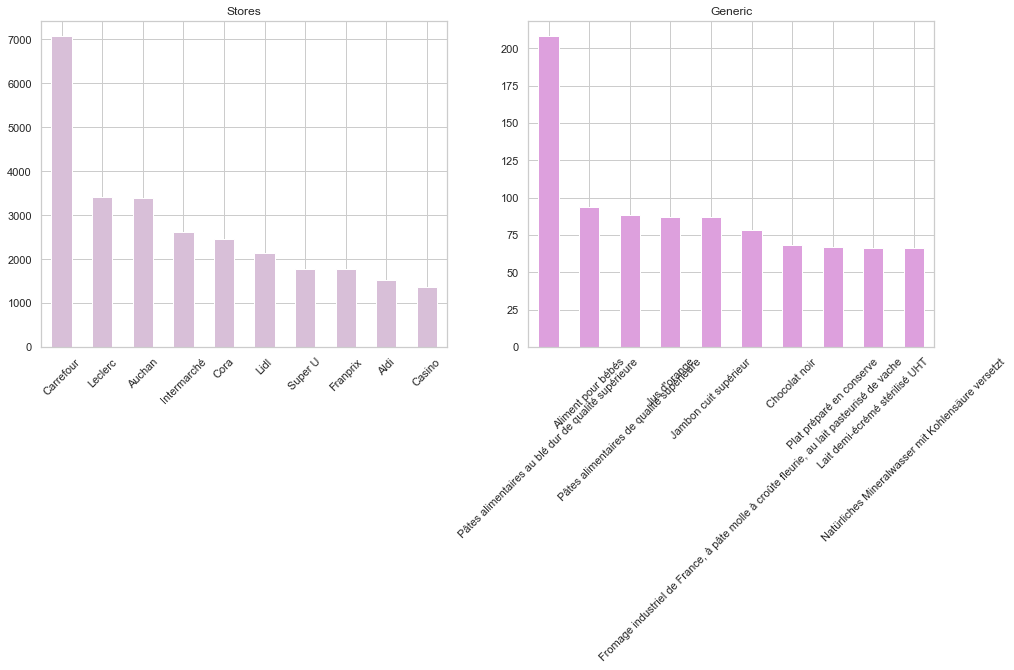

In [25]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(16,6))

stores[0:10].plot.bar(color=('thistle'),ax=axs[0])
axs[0].set_title("Stores")

generic[0:10].plot.bar(color=('plum'),ax=axs[1])
axs[1].set_title("Generic")

for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)

Knowing the store the product was purchased in may be useful, even if they are mostly European stores. Let's keep this one. As the generic names of products are all in French, we can infer this is only related to French products. As this information is too specific for our analysis, we'll drop this column.

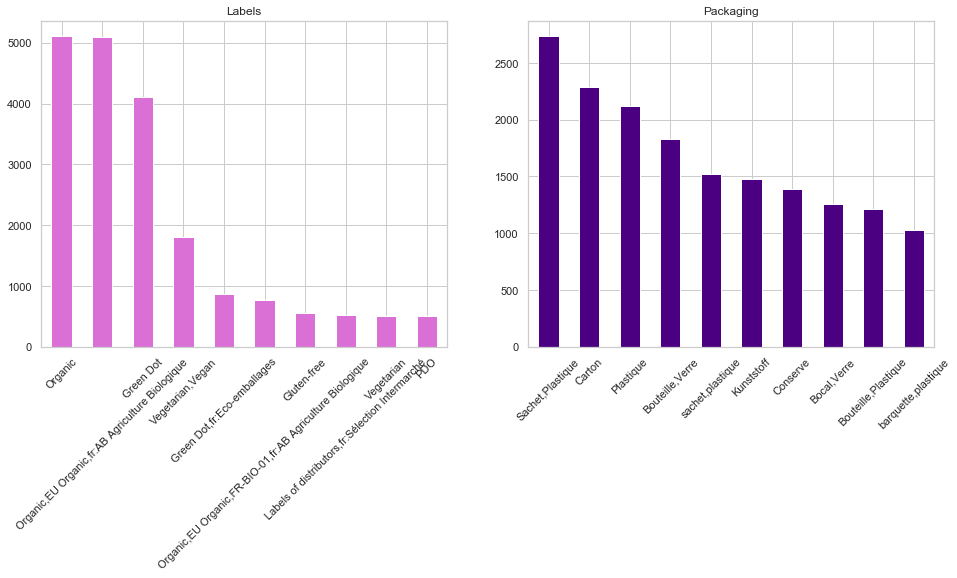

In [26]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(16,6))

labels[0:10].plot.bar(color=('orchid'),ax=axs[0])
axs[0].set_title("Labels")

packaging[0:10].plot.bar(color=('indigo'),ax=axs[1])
axs[1].set_title("Packaging")

for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=45)

Again, both of these columns seem primarily related to French products. However, as the labels column includes information on organic, gluten-free, and vegetarian products, let's keep it and just drop packaging. 

In [27]:
df = df.drop(['generic_name','origins','packaging','purchase_places'],axis=1)

#### Identifying Special Diets

If a product fits a vegetarian diet, than it contains no animal meat products. If it fits a vegan diet, it contains no animal or dairy products. Foods that are vegan are also vegetarian. If a food product is vegan/vegetarian, it is recorded in the product's label column. If a product has meat and/or dairy products, it is recorded in the categories column. 

The following code grabs the appropriate tag. 

Some food items lack information on their categories or labels. If this is case, the product's special diet will be labeled as 'Not Specified'. We will exclude these products from our analysis. 

In [28]:
#need to cast the columns labels_en and categories_en as strings

df[['labels_en','categories_en']] = df[['labels_en','categories_en']].astype(str)

def label_diets(row):
    if ('vegan' in row['labels_en'].lower()):
        return 'Vegan'
    if ('vegetarian' in row['labels_en'].lower()):
        return 'Vegetarian'
    if ('dair' in row['categories_en'].lower()):
        return 'Dairy Product'
    if ('meat' in row['categories_en'].lower()): 
        return 'Meat Product'
    
    return 'Not Specified'

#applying above function to every row
df['Special Diet'] = df.apply(lambda row: label_diets(row), axis=1)

In [ ]:
df.to_csv('final_food_data.csv')

#### Important Variables Within The Data

Out of the remaining 33 columns in our dataset, there are several key variables of interest.

The country column will tell us the country in which this product was uploaded to the food products database. We will rely on it as an indicator of the country the food product is associated with. Product_name serves as an identifier for each product. 

I will rely on the following columns to analyze the general nutrition characteristics of the food products: 
    - Saturated-Fat 
    - Trans-Fat
    - Fiber
    - Sugars
    - Proteins
    - Sodium 

Though the carbon footprint column has many missing values, we will still use it to learn what we can about the environmental impact of products.

We also now have a column 'Special Diet' that indicates whether the food product can be classified into a common diet type. 